In [1]:
import os, glob
import librosa, numpy as np
import pandas as pd


In [2]:
from pathlib import Path

BASE = Path("../data/raw/audio_depression")   # <-- matches the structure above
print("Exists:", BASE.exists())
print("Subfolders:", [p.name for p in BASE.iterdir() if p.is_dir()])


Exists: True
Subfolders: ['depression1', 'depression2', 'normal1', 'normal2']


In [3]:
from pathlib import Path

classes = ["depression1","depression2","normal1","normal2"]
for c in classes:
    n = len(list((BASE / c).glob("*.wav")))
    print(f"{c}: {n} files")


depression1: 200 files
depression2: 200 files
normal1: 200 files
normal2: 200 files


In [6]:
# Step 4: Load one sample audio file and inspect its properties

import librosa

# Let's pick one file path manually from our dataset
sample_path = BASE / "depression1" / "OAF_back_sad.wav"   # replace "sample1.wav" with any real file name you have

# Load the audio file
# y ‚Üí waveform (array of amplitude values)
# sr ‚Üí sample rate (how many audio samples per second)
y, sr = librosa.load(sample_path, sr=16000)  # we set 16k sample rate (common for speech)

# Print some info about the audio
print(f"Sample rate: {sr} Hz")          # how many samples per second
print(f"Duration: {len(y)/sr:.2f} sec") # convert sample count to time
print(f"Waveform shape: {y.shape}")     # number of data points


Sample rate: 16000 Hz
Duration: 2.56 sec
Waveform shape: (40999,)


üìò Explanation (read slowly)

librosa.load() ‚Üí reads your .wav file and converts it to a NumPy array.

y = the sound wave ‚Äî values between -1.0 and +1.0 representing loudness at each time step.

sr = sampling rate ‚Äî number of audio samples captured per second.

len(y)/sr = total duration (in seconds).

üëâ This confirms your file loads correctly and audio data is readable

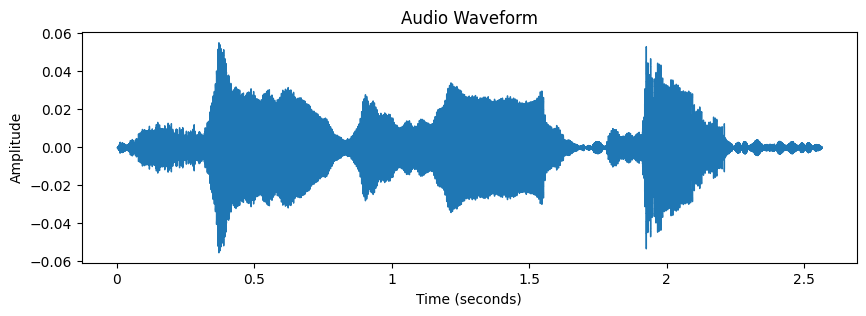

In [7]:
# Step 5: visualize the waveform of the sample audio
import librosa.display
import matplotlib.pyplot as plt

# create a figure
plt.figure(figsize=(10, 3))

# draw the waveform
librosa.display.waveshow(y, sr=sr)

# add title and labels
plt.title("Audio Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

# show the plot
plt.show()


üìò Explanation (line by line)

librosa.display.waveshow() ‚Üí takes your waveform array y and draws it over time.

X-axis: time (in seconds)

Y-axis: amplitude (-1 to +1 = how loud the sound is).

High peaks ‚Üí louder sound.

Flat/quiet sections ‚Üí silence or soft voice.

In [8]:
# Step 6: Extract MFCC (Mel-Frequency Cepstral Coefficients) features from the audio

import numpy as np

# Extract 13 MFCC features from the audio signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Print the shape to understand how many features and frames we got
print("MFCC shape:", mfcc.shape)

# To make it easier for ML models, we'll take the mean of each coefficient across all time frames
mfcc_mean = np.mean(mfcc, axis=1)

print("MFCC feature vector shape:", mfcc_mean.shape)
print("MFCC mean values:\n", mfcc_mean)


MFCC shape: (13, 81)
MFCC feature vector shape: (13,)
MFCC mean values:
 [-5.3064453e+02  7.8489700e+01  1.8757963e+01  9.7518940e+00
  2.1164202e+01 -4.5302734e-01 -1.6253120e+01 -1.1114124e+01
 -7.4364471e-01 -5.5895600e+00  3.4904721e+00 -1.9702674e+00
  1.3371092e+01]


üìò Explanation (line by line):

librosa.feature.mfcc() ‚Üí extracts MFCCs (small sets of numbers that describe the sound‚Äôs frequency pattern).

By default, we‚Äôre extracting 13 coefficients ‚Äî these describe how tone, pitch, and vocal energy change over time.

mfcc.shape ‚Üí (13, T) ‚Üí 13 features for every small frame of the audio.

np.mean(..., axis=1) ‚Üí we take the average of each MFCC over time ‚Üí gives one 13-length vector per file.

üëâ This ‚Äúmean MFCC vector‚Äù is like a fingerprint of that person‚Äôs voice

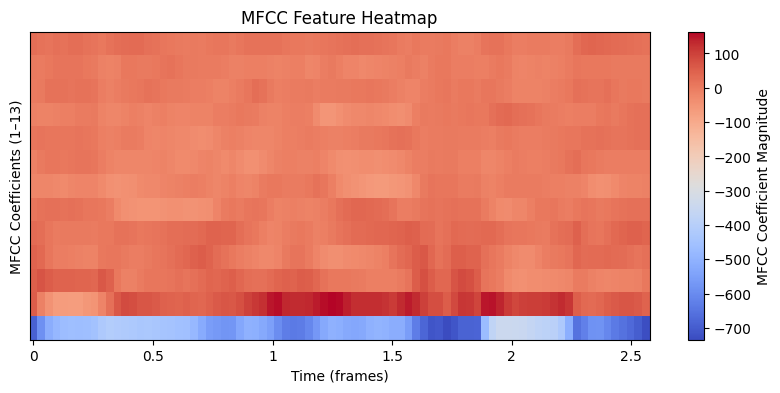

In [9]:
# Step 7: Visualize MFCC features as a heatmap

import librosa.display
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 4))

# Display MFCCs (like an image)
librosa.display.specshow(mfcc, sr=sr, x_axis='time')

# Add colorbar (to see intensity)
plt.colorbar(label='MFCC Coefficient Magnitude')

# Add title and labels
plt.title("MFCC Feature Heatmap")
plt.xlabel("Time (frames)")
plt.ylabel("MFCC Coefficients (1‚Äì13)")

# Show the plot
plt.show()


In [10]:
# Step 8: Loop through all .wav files and extract MFCC features for each one

import os
import numpy as np
import pandas as pd

# Dictionary to link folder name ‚Üí label
label_map = {
    "depression1": "Depressed",
    "depression2": "Depressed",
    "normal1": "NotDepressed",
    "normal2": "NotDepressed"
}

# Lists to store features and their labels
features = []
labels = []
file_names = []

# Loop through each folder
for folder, label in label_map.items():
    folder_path = BASE / folder

    # Loop through every .wav file inside this folder
    for file in os.listdir(folder_path):
        if file.endswith(".wav"):
            file_path = folder_path / file
            try:
                # 1Ô∏è‚É£ Load audio
                y, sr = librosa.load(file_path, sr=16000)

                # 2Ô∏è‚É£ Extract MFCCs
                mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
                mfcc_mean = np.mean(mfcc, axis=1)   # mean across time

                # 3Ô∏è‚É£ Store the results
                features.append(mfcc_mean)
                labels.append(label)
                file_names.append(file)

            except Exception as e:
                print(f"Error processing {file}: {e}")

# Convert all to a DataFrame
df = pd.DataFrame(features, columns=[f"mfcc_{i}" for i in range(1, 14)])
df["label"] = labels
df["filename"] = file_names

# Show the first few rows
print("‚úÖ Dataset created successfully!")
df.head()


‚úÖ Dataset created successfully!


mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5    mfcc_6  \
0 -530.644531  78.489700  18.757963   9.751894  21.164202 -0.453027   
1 -517.839722  82.785072  21.438154   5.768256  13.325665  1.231728   
2 -519.795227  71.355827  22.828283  18.992382  19.114937 -4.509700   
3 -506.947235  85.372025  18.271324  11.123451  20.044744  1.155351   
4 -537.116821  89.570488  32.787292  21.262123  15.631163  3.935444   

      mfcc_7     mfcc_8    mfcc_9    mfcc_10   mfcc_11   mfcc_12    mfcc_13  \
0 -16.253120 -11.114124 -0.743645  -5.589560  3.490472 -1.970267  13.371092   
1 -13.277678 -13.804917  0.972705  -7.884349  2.277087 -1.916609   7.257521   
2 -24.112745 -16.568436  2.123617 -10.486867  1.283807 -0.962527   5.633489   
3 -11.044332 -12.069978 -1.654348  -1.459551  0.556750 -4.238388   7.102100   
4  -1.122711  -8.325363 -6.334487  -8.484164 -6.241811 -7.892676   1.673975   

       label          filename  
0  Depressed  OAF_back_sad.wav  
1  Depressed   OAF_bar_sad.wav  
2  Depressed  OAF_base_sad.wav  
3  Depressed  OAF_bath_sad.wav  
4  Depressed  OAF_bean_sad.wav

In [11]:
# Step 9: Inspect our prepared DataFrame (df)

# 1Ô∏è‚É£ Check how many rows and columns we have
print("Shape of df (rows, columns):", df.shape)

# 2Ô∏è‚É£ Display first few rows to get a sense of structure
print("\nüîπ Sample rows:")
display(df.head())

# 3Ô∏è‚É£ Check data types of each column
print("\nüîπ Column info:")
print(df.dtypes)

# 4Ô∏è‚É£ Count how many files belong to each label
print("\nüîπ Label distribution:")
print(df['label'].value_counts())

# 5Ô∏è‚É£ Quick descriptive statistics for numeric columns (mfccs)
print("\nüîπ Summary statistics:")
display(df.describe())


Shape of df (rows, columns): (800, 15)

üîπ Sample rows:


mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5    mfcc_6  \
0 -530.644531  78.489700  18.757963   9.751894  21.164202 -0.453027   
1 -517.839722  82.785072  21.438154   5.768256  13.325665  1.231728   
2 -519.795227  71.355827  22.828283  18.992382  19.114937 -4.509700   
3 -506.947235  85.372025  18.271324  11.123451  20.044744  1.155351   
4 -537.116821  89.570488  32.787292  21.262123  15.631163  3.935444   

      mfcc_7     mfcc_8    mfcc_9    mfcc_10   mfcc_11   mfcc_12    mfcc_13  \
0 -16.253120 -11.114124 -0.743645  -5.589560  3.490472 -1.970267  13.371092   
1 -13.277678 -13.804917  0.972705  -7.884349  2.277087 -1.916609   7.257521   
2 -24.112745 -16.568436  2.123617 -10.486867  1.283807 -0.962527   5.633489   
3 -11.044332 -12.069978 -1.654348  -1.459551  0.556750 -4.238388   7.102100   
4  -1.122711  -8.325363 -6.334487  -8.484164 -6.241811 -7.892676   1.673975   

       label          filename  
0  Depressed  OAF_back_sad.wav  
1  Depressed   OAF_bar_sad.wav  
2  Depressed  OAF_base_sad.wav  
3  Depressed  OAF_bath_sad.wav  
4  Depressed  OAF_bean_sad.wav


üîπ Column info:
mfcc_1      float32
mfcc_2      float32
mfcc_3      float32
mfcc_4      float32
mfcc_5      float32
mfcc_6      float32
mfcc_7      float32
mfcc_8      float32
mfcc_9      float32
mfcc_10     float32
mfcc_11     float32
mfcc_12     float32
mfcc_13     float32
label        object
filename     object
dtype: object

üîπ Label distribution:
label
Depressed       400
NotDepressed    400
Name: count, dtype: int64

üîπ Summary statistics:


mfcc_1      mfcc_2      mfcc_3      mfcc_4      mfcc_5      mfcc_6  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean  -448.164612   67.585220   17.132988   18.081833    2.099081    3.492659   
std     64.879105   14.466640   12.421147   11.238636   12.717207    6.072478   
min   -572.609741   21.057430  -19.835682  -13.916399  -28.485708  -12.427296   
25%   -508.410088   57.878536    8.581188    9.419212   -8.817779   -0.865576   
50%   -469.078918   67.857227   17.250873   17.857500    1.762732    3.062880   
75%   -385.766739   77.869427   26.399843   26.115714   13.463721    7.386122   
max   -304.714020  116.333107   50.200394   47.054371   25.853559   21.586346   

           mfcc_7      mfcc_8      mfcc_9     mfcc_10     mfcc_11     mfcc_12  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   -15.013476   -7.491122   -3.172168   -7.687727    0.199043   -1.264592   
std      5.236519    7.056561    5.811206    4.549521    4.940608    2.922652   
min    -29.463028  -24.171230  -16.449125  -22.719330   -8.720795  -12.359288   
25%    -18.560727  -13.124835   -7.707847  -10.653466   -3.255706   -3.272300   
50%    -14.956190   -8.700688   -3.951077   -7.193769   -0.983225   -1.078229   
75%    -11.315417   -1.768653    1.512142   -4.281925    2.886351    0.726933   
max     -1.122711    9.584265   11.430861    3.512679   17.181089    6.608049   

          mfcc_13  
count  800.000000  
mean     4.701190  
std      2.794379  
min     -5.559339  
25%      2.882643  
50%      4.714680  
75%      6.601060  
max     13.371092

In [12]:
# Step 10: Split our DataFrame into X (features) and y (labels)

# 1Ô∏è‚É£ Drop non-numeric columns: 'label' and 'filename' ‚Üí these are not features
X = df.drop(['label', 'filename'], axis=1)

# 2Ô∏è‚É£ Our target labels
y = df['label']

# 3Ô∏è‚É£ Check the shapes
print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)

# 4Ô∏è‚É£ Preview
print("\nüîπ X sample:")
display(X.head())

print("\nüîπ y sample:")
print(y.head())


Shape of X (features): (800, 13)
Shape of y (labels): (800,)

üîπ X sample:


mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5    mfcc_6  \
0 -530.644531  78.489700  18.757963   9.751894  21.164202 -0.453027   
1 -517.839722  82.785072  21.438154   5.768256  13.325665  1.231728   
2 -519.795227  71.355827  22.828283  18.992382  19.114937 -4.509700   
3 -506.947235  85.372025  18.271324  11.123451  20.044744  1.155351   
4 -537.116821  89.570488  32.787292  21.262123  15.631163  3.935444   

      mfcc_7     mfcc_8    mfcc_9    mfcc_10   mfcc_11   mfcc_12    mfcc_13  
0 -16.253120 -11.114124 -0.743645  -5.589560  3.490472 -1.970267  13.371092  
1 -13.277678 -13.804917  0.972705  -7.884349  2.277087 -1.916609   7.257521  
2 -24.112745 -16.568436  2.123617 -10.486867  1.283807 -0.962527   5.633489  
3 -11.044332 -12.069978 -1.654348  -1.459551  0.556750 -4.238388   7.102100  
4  -1.122711  -8.325363 -6.334487  -8.484164 -6.241811 -7.892676   1.673975


üîπ y sample:
0    Depressed
1    Depressed
2    Depressed
3    Depressed
4    Depressed
Name: label, dtype: object


In [13]:
# Step 10.1: Shuffle the DataFrame to remove any order bias

# We use sample(frac=1) to randomly shuffle all rows
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Let's verify the shuffle worked
print("‚úÖ DataFrame shuffled successfully!")
print(df_shuffled.head())
print("\nLabel distribution after shuffle:")
print(df_shuffled['label'].value_counts())


‚úÖ DataFrame shuffled successfully!
       mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5    mfcc_6  \
0 -490.705780   64.468491  -0.158466   3.391864  13.710093 -3.771521   
1 -534.231079   72.670227  10.759274   9.968804  10.715336  4.325977   
2 -487.884399  111.463585  27.351320   6.153672  -0.328845  0.631472   
3 -393.808960   50.296959  16.540960  37.734612  -5.655691  8.872957   
4 -495.462860   82.512108  24.922518  21.315384  11.608415  3.598439   

      mfcc_7     mfcc_8    mfcc_9    mfcc_10   mfcc_11   mfcc_12   mfcc_13  \
0 -11.438346 -10.096786 -6.187771   0.067756 -5.694637  0.574527  4.582752   
1  -5.384468  -6.940378 -9.529648  -3.922791 -3.838531 -0.173350  7.446109   
2  -8.050969 -11.392557 -6.866659  -4.800926 -6.493132 -6.019952  2.153066   
3 -11.518519  -8.544005  3.233514 -12.873621  8.259370 -3.717383  5.786826   
4  -9.649680  -7.045944 -6.194668  -5.629793 -4.154367 -5.341705  3.501964   

          label               filename  
0  NotDepressed  OAF

üìò Explanation:

sample(frac=1) ‚Üí takes 100% of the rows (frac=1) but rearranges them randomly.

random_state=42 ‚Üí ensures repeatability (same shuffle every time for consistency).

reset_index(drop=True) ‚Üí resets index numbers (since after shuffle, old indexes are messy).

In [14]:
# Step 11: Split the shuffled dataset into training and testing sets

from sklearn.model_selection import train_test_split

# Features (X) and Labels (y) from the shuffled DataFrame
X = df_shuffled.drop(['label', 'filename'], axis=1)
y = df_shuffled['label']

# Split into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print the sizes
print("‚úÖ Data split successful!")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Total features per sample: {X_train.shape[1]}")


‚úÖ Data split successful!
Training samples: 640
Testing samples: 160
Total features per sample: 13


In [15]:
# Step 12: Train a Random Forest classifier on the training data

from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(
    n_estimators=100,     # number of trees
    random_state=42,      # reproducibility
)

# Train (fit) the model
rf_model.fit(X_train, y_train)

print("‚úÖ Model training complete!")


‚úÖ Model training complete!


In [16]:
# Step 13: Evaluate model performance on the test set

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1Ô∏è‚É£ Use the model to predict labels for the test data
y_pred = rf_model.predict(X_test)

# 2Ô∏è‚É£ Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# 3Ô∏è‚É£ Print results
print(f"‚úÖ Model Accuracy: {accuracy*100:.2f}%\n")

print("üîπ Classification Report:")
print(classification_report(y_test, y_pred))

# 4Ô∏è‚É£ Confusion Matrix
print("üîπ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


‚úÖ Model Accuracy: 95.62%

üîπ Classification Report:
              precision    recall  f1-score   support

   Depressed       0.96      0.95      0.96        80
NotDepressed       0.95      0.96      0.96        80

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160

üîπ Confusion Matrix:
[[76  4]
 [ 3 77]]


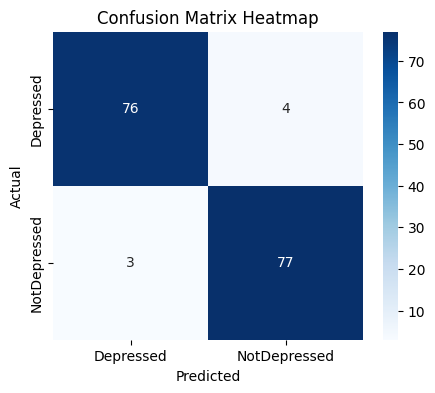

‚úÖ Model saved successfully at: ../models/random_forest_audio_model.pkl


In [17]:
# Step 14: Visualize Confusion Matrix as a heatmap and save the trained model

import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 1Ô∏è‚É£ Confusion Matrix again
cm = confusion_matrix(y_test, y_pred)

# 2Ô∏è‚É£ Plot the heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Depressed','NotDepressed'], yticklabels=['Depressed','NotDepressed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# 3Ô∏è‚É£ Save the trained model for later use
model_path = "../models/random_forest_audio_model.pkl"
joblib.dump(rf_model, model_path)

print(f"‚úÖ Model saved successfully at: {model_path}")


üìò Explanation (simple terms):

confusion_matrix again ‚Üí numeric 2√ó2 table from last step.

sns.heatmap() ‚Üí visualizes it (darker color = more predictions).

Top-left (TP): Correct Depressed

Bottom-right (TN): Correct NotDepressed

Off-diagonals: Wrong predictions

joblib.dump() ‚Üí saves the model file so you can load it later (e.g., in Streamlit or Flask app).

In [19]:
# Step 15: Load the saved model and make prediction on a new audio file

import joblib
import numpy as np
import librosa

# 1Ô∏è‚É£ Load the trained model
model_path = "../models/random_forest_audio_model.pkl"
rf_loaded = joblib.load(model_path)
print("‚úÖ Model loaded successfully!")

# 2Ô∏è‚É£ Pick a new audio file to test (you can replace the path)
new_audio_path = BASE / "depression1" / "OAF_back_sad.wav"   # change this file name to any real test file you have

# 3Ô∏è‚É£ Extract MFCC features for this new file (same process as training)
y_new, sr_new = librosa.load(new_audio_path, sr=16000)
mfcc_new = librosa.feature.mfcc(y=y_new, sr=sr_new, n_mfcc=13)
mfcc_mean_new = np.mean(mfcc_new, axis=1).reshape(1, -1)   # reshape for model input

# 4Ô∏è‚É£ Make prediction
prediction = rf_loaded.predict(mfcc_mean_new)[0]

print(f"üéØ Prediction for '{new_audio_path.name}' ‚Üí {prediction}")


‚úÖ Model loaded successfully!
üéØ Prediction for 'OAF_back_sad.wav' ‚Üí Depressed


c:\Users\kushagra\Desktop\CSAI\Depression_Detection_Model\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


üìò Explanation (line by line):

joblib.load() ‚Üí reloads your saved model file.

librosa.load() + feature.mfcc() ‚Üí reuses the same feature extraction process for the new file (important: use same parameters).

.reshape(1, -1) ‚Üí converts the MFCC array into a single row ‚Üí model can read it.

predict() ‚Üí the model outputs either "Depressed" or "NotDepressed" based on voice features.v